In [ ]:
### Let's get started by importing some libraries

In [1]:
import numpy as np 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
## Loading the csv file into ---> a dataframe

In [2]:
df = pd.read_csv("perrin-freres-monthly-champagne-.csv")

In [ ]:
## Let's explore the data 

In [3]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [ ]:
## Renaming the columns

In [4]:
df.columns = ["Month", "Sales"]

In [5]:
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [6]:
df.shape

(107, 2)

In [7]:
df.isnull().sum()

Month    1
Sales    2
dtype: int64

In [8]:
df.tail()

,Month,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [ ]:
## Removing missing values from the data

In [9]:
df.dropna(inplace=True)

In [10]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [11]:
df.shape

(105, 2)

In [12]:
df.dtypes

Month     object
Sales    float64
dtype: object

In [13]:
df["Month"] = pd.to_datetime(df["Month"])

In [14]:
df.dtypes

Month    datetime64[ns]
Sales           float64
dtype: object

In [15]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [ ]:
## Setting date columns to index, so we can process the data with Time Series Algorithms

In [16]:
df.set_index("Month", inplace=True)

In [17]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [ ]:
## Statistic description of the data

In [18]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


In [ ]:
## Checking whether there is a stationarity in the data or not: Visualization

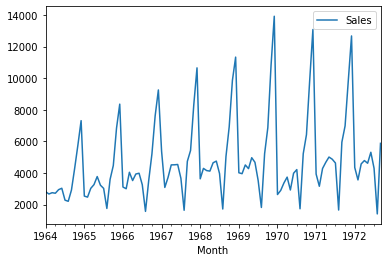

In [19]:
df.plot()

In [ ]:
## We can see clearly that there is a kind of seasonality in the data

In [ ]:
## Now let's perform a statistical test (Augmented Dickey-Fuller - adfuller) that will return a p-value to check whether the data is stationary or not 

In [ ]:
## . Null hypothesis: my data is not stationary (p-value < 0.05)
## . Alternative hypothesis my data is stationary (p-value > 0.05)
## For more information about the null hypothesis and alternative 
## hypothesis read this article:
## https://towardsdatascience.com/null-hypothesis-and-the-p-value-fdc129db6502

In [20]:
from statsmodels.tsa.stattools import adfuller

In [24]:
def adfuller_test(sales):
    result = adfuller(sales)
    labels = ["adf test statistics", "p-value", "lags used", "nobs", "critical values", "icbest"]
    
    for value, label in zip(result, labels):
        print("{} : {}".format(label, value))
        
    if result[1] < 0.05:
        print("Strong evidence againt null hypothesis, reject null hypothesis & data is stationary")
    else:
        print("Weak evidence against null hypothesis, null hypothesis cannot be rejected & data is not stationary")
   

In [25]:
adfuller_test(df.Sales)

adf test statistics : -1.8335930563276237
p-value : 0.3639157716602447
lags used : 11
nobs : 93
critical values : {'1%': -3.502704609582561, '5%': -2.8931578098779522, '10%': -2.583636712914788}
icbest : 1478.4633060594724
Weak evidence against null hypothesis, null hypothesis cannot be rejected & data is not stationary


In [ ]:
## As our data must be stationary to use time series algorithm, 
## let's make the data stationary
## The reason is stationary data are easier to analyze and the way 
## they change are predicatable
## For more information read this article: 
## https://towardsdatascience.com/stationarity-in-time-series-analysis-90c94f27322

In [ ]:
## We are going to make data stationary using the shift differencing

In [26]:
df["seasonal_diff"] = df["Sales"] - df["Sales"].shift(12).dropna()

In [28]:
df.head(30)

,Sales,seasonal_diff
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN
1964-06-01,3036.0,NaN
1964-07-01,2282.0,NaN
1964-08-01,2212.0,NaN
1964-09-01,2922.0,NaN


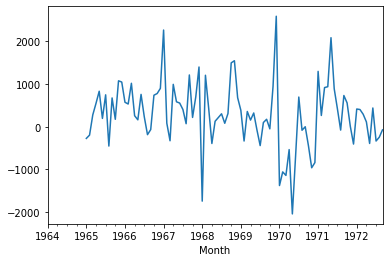

In [29]:
df["seasonal_diff"].plot()

In [31]:
adfuller_test(df["seasonal_diff"].dropna())

adf test statistics : -7.626619157213163
p-value : 2.060579696813685e-11
lags used : 0
nobs : 92
critical values : {'1%': -3.503514579651927, '5%': -2.893507960466837, '10%': -2.583823615311909}
icbest : 1294.7753384560438
Strong evidence againt null hypothesis, reject null hypothesis & data is stationary


### Let's apply the ARIMA model
### AR (p) + I (d) + MA (q)

In [ ]:
## p ---> pacf graph

In [33]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [ ]:
## q ---> acf grap
## d = 1

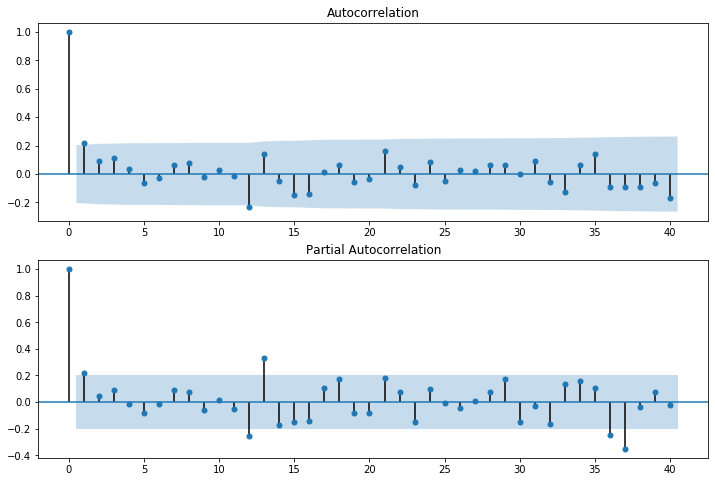

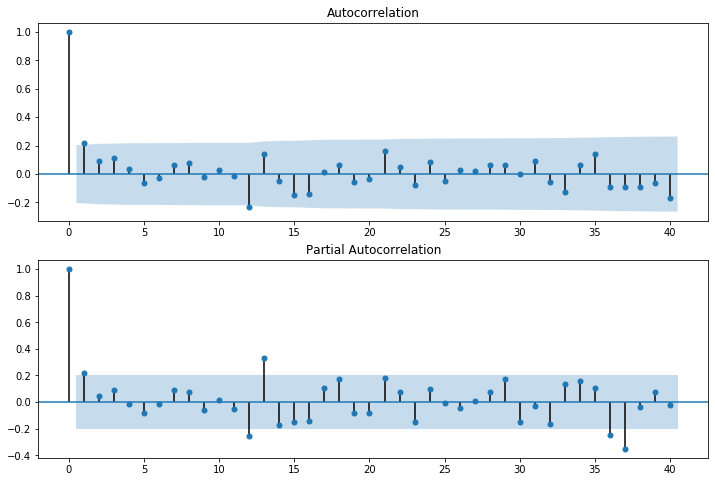

In [34]:
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
plot_acf(df["seasonal_diff"].dropna(), lags = 40, ax=ax1)

ax2 = fig.add_subplot(212)
plot_pacf(df["seasonal_diff"].dropna(), lags = 40, ax=ax2)

In [ ]:
## p,d,q = 1, 1, 1

In [35]:
from statsmodels.tsa.arima_model import ARIMA

In [36]:
model = ARIMA(df["Sales"], order=(1,1,1))

In [37]:
model = model.fit()

In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Tue, 29 Jun 2021   AIC                           1910.251
Time:                        11:42:16   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7822     12.405      1.836      0.066      -1.532      47.096
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [44]:
df.shape

(105, 3)

In [63]:
df["forecast"] = model.predict(start=2, end=104, dynamic=True)

In [64]:
df.tail(50)

,Sales,seasonal_diff,forecast
Month,,,
1968-08-01,1723.0,80.0,22.782204
1968-09-01,5048.0,309.0,22.782204
1968-10-01,6922.0,1494.0,22.782204
1968-11-01,9858.0,1544.0,22.782204
1968-12-01,11331.0,680.0,22.782204
1969-01-01,4016.0,383.0,22.782204
1969-02-01,3957.0,-335.0,22.782204
1969-03-01,4510.0,356.0,22.782204
1969-04-01,4276.0,155.0,22.782204


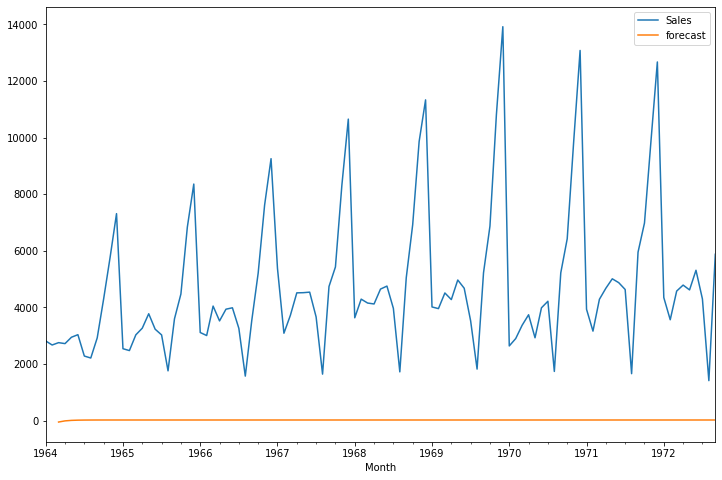

In [65]:
df[["Sales", "forecast"]].plot(figsize=(12,8))

In [ ]:
## We can see ARIMA model is not suitable for seasonal data
## Let's use SARIMAX ===> for seasonal data

### let's apply SARIMAX

In [66]:
import statsmodels.api as sm

In [67]:
model_2 = sm.tsa.statespace.SARIMAX(df["Sales"], order=(1,1,1), seasonal_order=(1,1,1,12))

In [68]:
model_2 = model_2.fit()

In [102]:
df["forecast_SARIMAX"] = model_2.predict(start=90, end=104, dynamic=True)

In [103]:
df.tail(25)

,Sales,seasonal_diff,forecast,forecast_SARIMAX
Month,,,,
1970-09-01,5221.0,-1.0,22.782204,NaN
1970-10-01,6424.0,-448.0,22.782204,NaN
1970-11-01,9842.0,-961.0,22.782204,NaN
1970-12-01,13076.0,-840.0,22.782204,NaN
1971-01-01,3934.0,1295.0,22.782204,NaN
1971-02-01,3162.0,263.0,22.782204,NaN
1971-03-01,4286.0,916.0,22.782204,NaN
1971-04-01,4676.0,936.0,22.782204,NaN
1971-05-01,5010.0,2083.0,22.782204,NaN


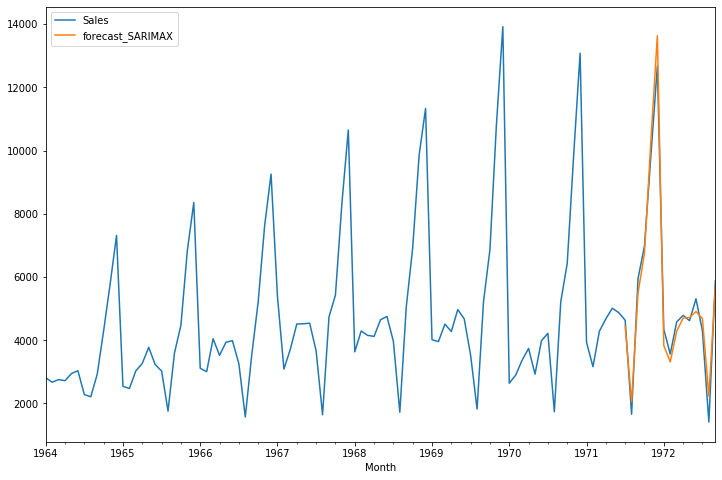

In [104]:
df[["Sales", "forecast_SARIMAX"]].plot(figsize=(12,8))

In [ ]:
## We can see clearly that SARIMAX model performs better on the seasonal data

### let's create new dataset and perform a prediction

In [84]:
from pandas.tseries.offsets import DateOffset

In [88]:
df.index[-1]

Timestamp('1972-09-01 00:00:00')

In [111]:
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(48)]

In [112]:
future_dates

[Timestamp('1972-09-01 00:00:00'),
 Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00'),
 Timestamp('1974-09-01 00:00:00'),
 Timestamp('1974-10-01 00:00:00'),
 Timestamp('1974-11-01 00:00:00'),
 Timestamp('1974-12-01 00:00:00'),
 Timestamp('1975-01-

In [113]:
future_dataset = pd.DataFrame(index=future_dates[1:], columns = df.columns)

In [114]:
future_dataset.tail()

,Sales,seasonal_diff,forecast,forecast_SARIMAX,forecast_SARIMAX2
1976-04-01,NaN,NaN,NaN,NaN,NaN
1976-05-01,NaN,NaN,NaN,NaN,NaN
1976-06-01,NaN,NaN,NaN,NaN,NaN
1976-07-01,NaN,NaN,NaN,NaN,NaN
1976-08-01,NaN,NaN,NaN,NaN,NaN


In [148]:
future_df = pd.concat([df, future_dataset])

In [149]:
future_df.tail()

,Sales,seasonal_diff,forecast,forecast_SARIMAX,forecast_SARIMAX2
1976-04-01,NaN,NaN,NaN,NaN,NaN
1976-05-01,NaN,NaN,NaN,NaN,NaN
1976-06-01,NaN,NaN,NaN,NaN,NaN
1976-07-01,NaN,NaN,NaN,NaN,NaN
1976-08-01,NaN,NaN,NaN,NaN,NaN


In [100]:
df.shape

(105, 4)

In [150]:
future_df.shape

(152, 5)

In [ ]:
## the additional data generated have been added

In [154]:
future_df["forecast_SARIMAX2"]= model_2.predict(start=104, end=152, dynamic=True)

In [155]:
future_df.tail()

,Sales,seasonal_diff,forecast,forecast_SARIMAX,forecast_SARIMAX2
1976-04-01,NaN,NaN,NaN,NaN,5563.592275
1976-05-01,NaN,NaN,NaN,NaN,5514.287023
1976-06-01,NaN,NaN,NaN,NaN,6041.491452
1976-07-01,NaN,NaN,NaN,NaN,5105.862185
1976-08-01,NaN,NaN,NaN,NaN,2199.475340


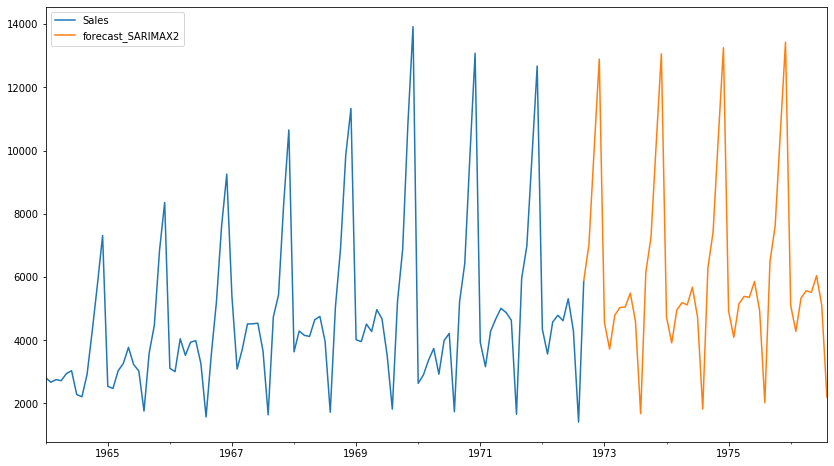

In [158]:
future_df[["Sales", "forecast_SARIMAX2"]].plot(figsize=(14,8))

### Let's apply fbProphet

In [117]:
df.head()

,Sales,seasonal_diff,forecast,forecast_SARIMAX,forecast_SARIMAX2
Month,,,,,
1964-01-01,2815.0,NaN,NaN,NaN,NaN
1964-02-01,2672.0,NaN,NaN,NaN,NaN
1964-03-01,2755.0,NaN,-49.224633,NaN,NaN
1964-04-01,2721.0,NaN,-8.493677,NaN,NaN
1964-05-01,2946.0,NaN,9.197650,NaN,NaN


In [118]:
fbp_df = df["Sales"]

In [119]:
fbp_df.head()

Month
1964-01-01    2815.0
1964-02-01    2672.0
1964-03-01    2755.0
1964-04-01    2721.0
1964-05-01    2946.0
Name: Sales, dtype: float64

In [123]:
fbp_df = fbp_df.reset_index()

In [124]:
fbp_df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [125]:
fbp_df.columns

Index(['Month', 'Sales'], dtype='object')

In [126]:
fbp_df.columns = ["ds", "y"]

In [127]:
fbp_df.head()

,ds,y
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [128]:
from fbprophet import Prophet

In [129]:
m = Prophet()

In [130]:
model = m.fit(fbp_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [131]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [162]:
future_fb_df = model.make_future_dataframe(periods=48, freq="M")

In [163]:
future_fb_df.tail()

,ds
148,1976-04-30
149,1976-05-31
150,1976-06-30
151,1976-07-31
152,1976-08-31


In [141]:
df.tail()

,Sales,seasonal_diff,forecast,forecast_SARIMAX,forecast_SARIMAX2
Month,,,,,
1972-05-01,4618.0,-392.0,22.782204,4717.511780,NaN
1972-06-01,5312.0,438.0,22.782204,4906.404485,NaN
1972-07-01,4298.0,-335.0,22.782204,4685.437306,NaN
1972-08-01,1413.0,-246.0,22.782204,2232.408926,NaN
1972-09-01,5877.0,-74.0,22.782204,5686.558254,5878.712076


In [164]:
prediction = model.predict(future_fb_df)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1964-01-01,3458.475053,1445.264888,3332.327045,3458.475053,3458.475053,-1113.259384,-1113.259384,-1113.259384,-1113.259384,-1113.259384,-1113.259384,0.0,0.0,0.0,2345.215668
1,1964-02-01,3490.436774,1026.966009,2893.819003,3490.436774,3490.436774,-1600.336356,-1600.336356,-1600.336356,-1600.336356,-1600.336356,-1600.336356,0.0,0.0,0.0,1890.100418
2,1964-03-01,3520.336449,1822.320481,3673.138441,3520.336449,3520.336449,-787.089069,-787.089069,-787.089069,-787.089069,-787.089069,-787.089069,0.0,0.0,0.0,2733.247380
3,1964-04-01,3552.298171,1590.772961,3479.308283,3552.298171,3552.298171,-948.610358,-948.610358,-948.610358,-948.610358,-948.610358,-948.610358,0.0,0.0,0.0,2603.687813
4,1964-05-01,3583.228868,1869.723778,3876.120468,3583.228868,3583.228868,-747.055615,-747.055615,-747.055615,-747.055615,-747.055615,-747.055615,0.0,0.0,0.0,2836.173253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,1976-04-30,6325.381207,4791.539415,6671.983333,6220.526883,6430.437684,-627.545060,-627.545060,-627.545060,-627.545060,-627.545060,-627.545060,0.0,0.0,0.0,5697.836147
149,1976-05-31,6338.026832,4749.038437,6678.195818,6229.517647,6448.077063,-585.643298,-585.643298,-585.643298,-585.643298,-585.643298,-585.643298,0.0,0.0,0.0,5752.383534
150,1976-06-30,6350.264534,4535.146565,6530.155043,6236.319639,6465.509831,-855.371150,-855.371150,-855.371150,-855.371150,-855.371150,-855.371150,0.0,0.0,0.0,5494.893385
151,1976-07-31,6362.910160,1860.595338,3757.960431,6243.320162,6480.788434,-3619.463807,-3619.463807,-3619.463807,-3619.463807,-3619.463807,-3619.463807,0.0,0.0,0.0,2743.446353


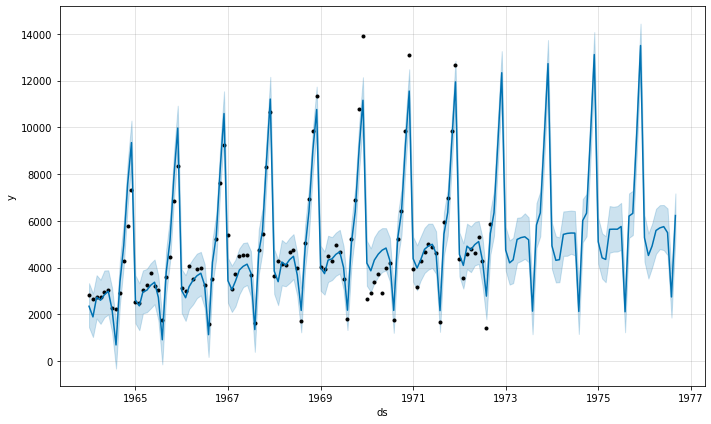

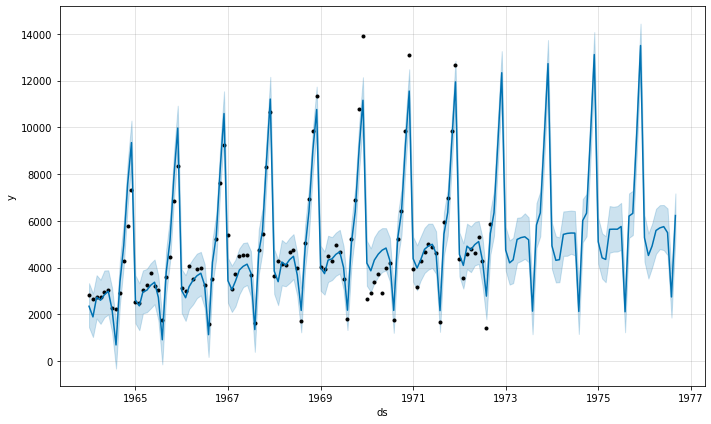

In [165]:
model.plot(prediction)

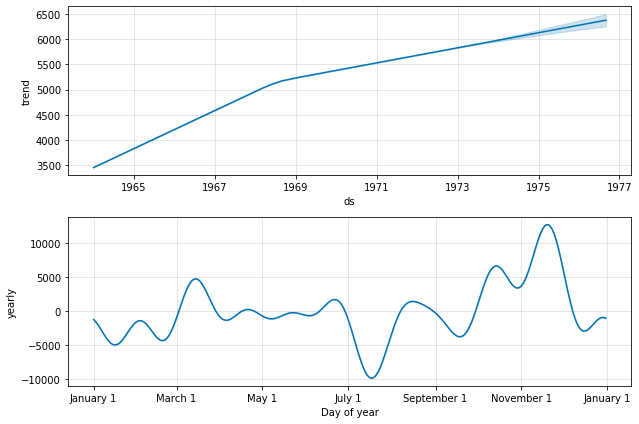

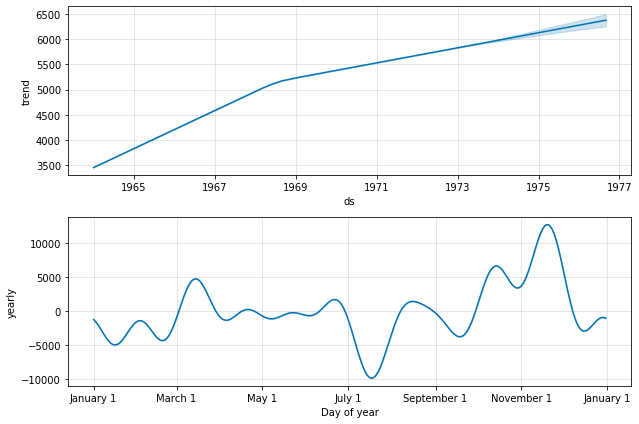

In [166]:
model.plot_components(prediction)